In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

# Time-Series Analysis

Time series is a series of data points indexed in time order. The data is organized by relatively deterministic timestamps and contains additional information we can extract.

### Dataset Description

Cybersecurity Breaches

In [85]:
df = pd.read_csv('data/Cyber Security Breaches.csv')

In [86]:
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


Before we analyze our dataset let set if our time columns are actually time-series objects.

In [87]:
df.dtypes

Unnamed: 0                           int64
Number                               int64
Name_of_Covered_Entity              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

We can see `Date_of_Breach`, `Date_Posted_or_Updated`, `breach_start`, `breach_end`, and `year` all need to be converted to the `datetime` format.

`datetime` is a module that supplies classes for manipulating dates and times in both simple and complex ways. `date` and `time` arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

Let's convert these columns to datetime format.

In [88]:
df['Date_of_Breach']

0      10/16/2009
1       9/22/2009
2      10/12/2009
3       10/9/2009
4       9/27/2009
5       9/27/2009
6       9/27/2009
7       9/27/2009
8       9/27/2009
9       9/27/2009
10     10/20/2009
11     10/11/2009
12     11/12/2009
13     10/31/2009
14      12/8/2009
15     10/22/2009
16     11/26/2009
17      9/22/2009
18     12/11/2009
19     11/10/2009
20     10/26/2009
21      10/7/2009
22      12/1/2009
23      12/9/2009
24     12/15/2009
25     11/19/2009
26     11/19/2009
27      1/10/2010
28     11/24/2009
29      1/18/2010
          ...    
458    12/29/2011
459    12/29/2011
460      1/1/2012
461     1/11/2012
462     1/15/2012
463    12/31/2011
464    12/20/2011
465      1/9/2012
466     2/11/2012
467     1/11/2012
468     1/11/2012
469     1/12/2012
470     1/11/2012
471     2/25/2012
472     1/16/2012
473     1/11/2012
474     1/26/2012
475     1/11/2012
476     1/18/2012
477     1/26/2012
478    12/31/2011
479    01/17/2012
480    07/01/2008
481      2/2/2012
482     6/

In [89]:
df['Date_of_Breach'] = pd.to_datetime(df['Date_of_Breach'], format='%m/%d/%Y')

In order to plot with pandas the time must be the index of the dataframe.

In [90]:
df = df.set_index('Date_of_Breach')

In [91]:
df.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
Date_of_Breach,,,,,,,,,,,,,
2009-10-16,1,0,Brooke Army Medical Center,TX,NaN,1000,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
2009-09-22,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2009-10-12,3,2,Alaska Department of Health and Social Services,AK,NaN,501,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
2009-10-09,4,3,Health Services for Children with Special Need...,DC,NaN,3800,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
2009-09-27,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


Now, we can plot the volume over time.

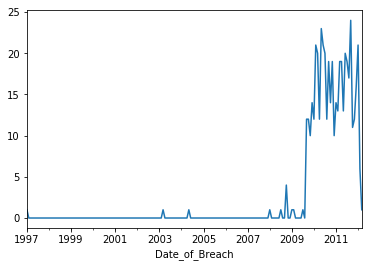

In [92]:
df['Number'].resample('M').count().plot()

The plot above demonstrates the number of events shown over time. Now it is your turn!

# Exercise 1

* Choose any one of the time-series columns
* Plot the number of events over time

We also look at the mean and standard deviation of the number of cyber events `Date_of_Breach` over time.

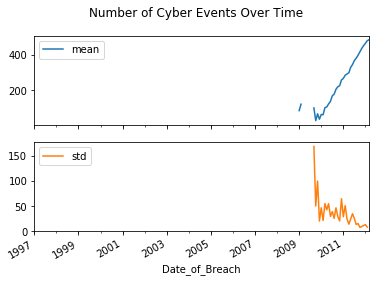

In [96]:
r = df['Number'].resample('M').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Cyber Events Over Time')
plt.show()

We can take a look at any of our numeric data.

MemoryError: 

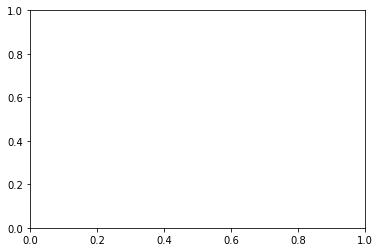

In [102]:
df['Individuals_Affected'].resample('T').mean().plot(kind='bar')

## Outliers, where are they, and why you should pay attention to them?

If you look at the number of occurrences of unique values within a dataset, one of the most common patterns is Zipf's law.

<img src="images/Zipf.png">

Zipf's Law: The highest occuring variable will have double the number of occurrences of the second highest occurring variable, triple the amount of the third and so on. 

The definition of an outlier will be different for every dataset. As a general rule of thumb, you may consider anything more than 3 standard deviations away from the mean as an outlier. 

<img src="images/pot_outlier.png">

Another potential look at an outlier, is also shown below:

<img src="images/pot_outlier2.png">

Typically, you can find outliers based on distirbution, this may or may not be as true in security. Outliers does not mean there is an intrusion, but could provide necessary insight into the ongoings of a system. For a first pass of EDA, it is recommended you check what the distribution of each feature.

### Exercise 3

1. Create three distribution plots of features for features of which you are interested?

Why should you worry about outliers?

Keeping outliers in your dataset may turn out in your model overfitting (being too accurate, not general enough). Removing all the outliers may result in your model being too generalised (it doesn't do well on anything out of the ordinary). Best to experiment with this iteratively to find the best way to deal with outliers.

## Getting more out of your data

Right now we have less than 15 features, but it is quite possible to have hundreds of features or too few features.

After you started to:
* Form an understanding
* Got an idea of the distirbutions
* Found some outliers and dealth with them

Feature engineering can be broken down into categories: adding, removing, and changing.

Let us talk about removing a feature. It is pretty easy to see we have a couple of columns with duplicate information. `cc`, `country`, and `host` all provide us with some geographical information. We might choose not to remove `host` but we can remove either `cc` or `country`.

In [ ]:
df.drop(columns=['cc'])

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,France,NaN,NaN,NaN,48.8600,2.3500,NaN
5,3/3/13 21:58,groucho-tokyo,3323217250,TCP,NaN,32628.0,2323.0,198.20.69.98,United States,Illinois,IL,60661,41.8825,-87.6441,NaN
6,3/3/13 21:59,groucho-oregon,3730416887,TCP,NaN,6000.0,1433.0,222.89.164.247,China,Henan Sheng,41,NaN,34.6836,113.5325,NaN
7,3/3/13 22:07,groucho-singapore,3738622573,TCP,NaN,6000.0,3306.0,222.214.218.109,China,Sichuan Sheng,51,NaN,30.6667,104.0667,NaN
8,3/3/13 22:12,groucho-oregon,3683919430,TCP,NaN,6000.0,1433.0,219.148.38.70,China,Hebei,13,NaN,39.8897,115.2750,NaN
9,3/3/13 22:14,groucho-singapore,1007884304,TCP,NaN,6000.0,1433.0,60.19.24.16,China,Liaoning,21,NaN,41.7922,123.4328,NaN


The same can be said for `locale` and `localeabbr`.

In [ ]:
df.drop(columns=['localeabbr'])

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,48.8600,2.3500,NaN
5,3/3/13 21:58,groucho-tokyo,3323217250,TCP,NaN,32628.0,2323.0,198.20.69.98,US,United States,Illinois,60661,41.8825,-87.6441,NaN
6,3/3/13 21:59,groucho-oregon,3730416887,TCP,NaN,6000.0,1433.0,222.89.164.247,CN,China,Henan Sheng,NaN,34.6836,113.5325,NaN
7,3/3/13 22:07,groucho-singapore,3738622573,TCP,NaN,6000.0,3306.0,222.214.218.109,CN,China,Sichuan Sheng,NaN,30.6667,104.0667,NaN
8,3/3/13 22:12,groucho-oregon,3683919430,TCP,NaN,6000.0,1433.0,219.148.38.70,CN,China,Hebei,NaN,39.8897,115.2750,NaN
9,3/3/13 22:14,groucho-singapore,1007884304,TCP,NaN,6000.0,1433.0,60.19.24.16,CN,China,Liaoning,NaN,41.7922,123.4328,NaN


Now, lets decide from our research that the ASN (Autonomous System Number) description information. We can create a new feature and add this to our dataset.

In [ ]:
for index, row in df.iterrows():
    try:
        obj = IPWhois(row['srcstr'])
        res = obj.lookup_whois()
        row['ASN'] = res['asn_description']
    except:
        row['ASN'] = " "


In [ ]:
df['ASN']

### Exercise 4

* Take some time and familiarize yourself with this dataset
* Create/remove/change a feature you believe would be important to this dataset


### Feature Contribution

Feature contribution is a method of figuring out how much each feature influences a model. Knowing how much a feture contirbutes to a model can give you direction as to where to go next with your feature engineering.

<img src="images/zip_feat.png">

Removing features reduces the dimensionality of your data. It mean syour model has fewer connections to make to figure out the best wya of fitting the data. You might find rmeoving features means your model can get the same (or better) results on fewer data and in less time.

This is where we would begin to build our first model, before we get into models we will explore more concepts of looking a data (i.e. graph-based and time-series based. 

References:
1. https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e
2. https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
3. https://github.com/ritikabhasker/Intro-to-EDA/blob/master/Intro_to_EDA.ipynb
